In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imbalanced-learn

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    '''Convert class vector (integers from 0 to nb_classes)
    to binary class matrix, for use with categorical_crossentropy.
    '''
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1.
    return Y


def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp + 1e-06)
    npv = float(tn) / (tn + fn + 1e-06)
    sensitivity = float(tp) / (tp + fn + 1e-06)
    specificity = float(tn) / (tn + fp + 1e-06)
    mcc = float(tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) + 1e-06)
    f1 = float(tp * 2) / (tp * 2 + fp + fn + 1e-06)
    return acc, precision, npv, sensitivity, specificity, mcc, f1

(996, 326)
Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6841 - loss: 0.6585 - val_accuracy: 0.8700 - val_loss: 0.4363
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9158 - loss: 0.3066 - val_accuracy: 0.9000 - val_loss: 0.2473
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9584 - loss: 0.1107 - val_accuracy: 0.9250 - val_loss: 0.2215
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9937 - loss: 0.0346 - val_accuracy: 0.9300 - val_loss: 0.2294
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9998 - loss: 0.0111 - val_accuracy: 0.9250 - val_loss: 0.2635
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9300 - val_loss: 0.2735
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9300 - val_loss: 0.2808
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9350

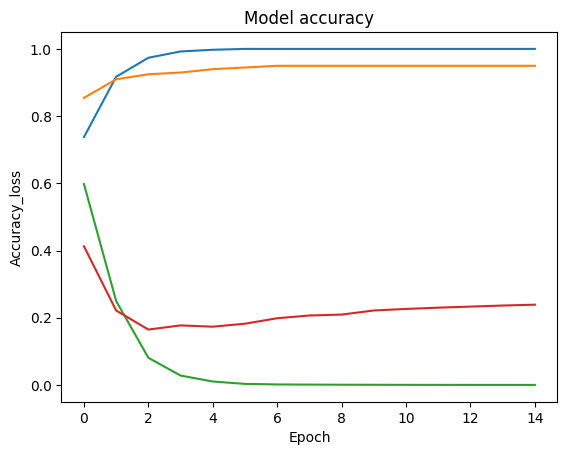

In [14]:

from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.models import Sequential, model_from_json
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import GRU,Bidirectional
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold,train_test_split
import os

from keras.layers import Dense,Input,Dropout

def get_CNN_model(input_dim,out_dim):
    model = Sequential()
    model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation= 'relu'))
    model.add(MaxPooling1D(pool_size=2,strides=1,padding="same"))
    model.add(Conv1D(filters = 16, kernel_size =  3, padding = 'same', activation= 'relu'))
    model.add(MaxPooling1D(pool_size=2,strides=1,padding="same"))
    # model.add(Bidirectional(GRU(32, return_sequences=True)))
    # model.add(Dropout(0.5))
    # model.add(Bidirectional(GRU(16, return_sequences=True)))
    # model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(int(input_dim/4), activation = 'relu'))
    model.add(Dense(int(input_dim/8), activation = 'relu'))
    model.add(Dense(out_dim, activation = 'softmax',name="Dense_2"))
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics =['accuracy'])
    return model
#binary_crossentropy  categorical_crossentropy


#Load data
path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
train_data = pd.read_csv(path + 'selected_features_allfeat/XtrainData_wSMOTE.csv')
print(np.shape(train_data))

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

# data_np = np.array(X_train)
# data = data_np[:, :]

# label1=np.ones((394,1))#Value can be changed
# label2=np.zeros((626,1))
# labels=np.append(label1,label2)

# from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(data, labels)
# # y = labels


# X_train, X_ind, y_train, y_ind = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape)
# print(X_ind.shape)
# print(y_train.shape)
# print(y_ind.shape)

X = np.array(data,dtype=float)


[m1,n1] = np.shape(X)
# y = np.array(y_train)

# X =
y = y_train

fldr_path = path+'Update_results/CNN_ACE_CNN_GRU/'
if not os.path.exists(fldr_path):
    os.makedirs(fldr_path)

fldr_name = 'CNN_ACE_CNN_GRU'

sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5


sepscores = []
sepscores_ = []
ytest=np.ones((1,2))*0.5
yscore=np.ones((1,2))*0.5

[sample_num,input_dim]=np.shape(X)
out_dim=2
ytest=np.ones((1,2))*0.5
yscore=np.ones((1,2))*0.5
probas_cnn=[]
tprs_cnn = []
sepscore_cnn = []

reduce_lr =keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
call = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=25),reduce_lr]

skf= StratifiedKFold(n_splits=5,shuffle=True)
for i, (train, test) in enumerate (skf.split(X,y)):
    clf_cnn = get_CNN_model(input_dim,out_dim)
    X_train_cnn=np.reshape(X[train],(-1,1,input_dim))
    X_test_cnn=np.reshape(X[test],(-1,1,input_dim))
    y_test=to_categorical(y[test])
    ytest=np.vstack((ytest,y_test))
    y_test_tmp=y[test]

    history = clf_cnn.fit(X_train_cnn, to_categorical(y[train]),validation_data=(X_test_cnn, y_test),epochs=15)#,callbacks = call)
    y_cnn_probas=clf_cnn.predict(X_test_cnn)
    probas_cnn.append(y_cnn_probas)
    y_class= categorical_probas_to_classes(y_cnn_probas)
    yscore=np.vstack((yscore,y_cnn_probas))

    acc, precision,npv, sensitivity, specificity, mcc,f1 = calculate_performace(len(y_class), y_class,y[test])
    mean_fpr = np.linspace(0, 1, 100)
    fpr, tpr, thresholds = roc_curve(y[test], y_cnn_probas[:, 1])
    tprs_cnn.append(np.interp(mean_fpr, fpr, tpr))
    tprs_cnn[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    sepscore_cnn.append([acc, sensitivity, specificity, mcc,f1,roc_auc])
    print('CNN:acc=%f,sensitivity=%f,specificity=%f,mcc=%f,f1=%f,roc_auc=%f'
          % (acc,  sensitivity, specificity, mcc,f1, roc_auc))
    clf_cnn.save(f'{fldr_path}/' + str(i) + 'CNN_GRU_new.keras')

# # serialize model to JSON
# model_json = clf_cnn.to_json()
# with open(path+"CNN_GRU/model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# clf_cnn.save_weights(path+"CNN_GRU/model.h5")
# print("Saved model to disk")

row=ytest.shape[0]
ytest=ytest[np.array(range(1,row)),:]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv( f'{fldr_path}/ytest.csv')

yscore_=yscore[np.array(range(1,row)),:]
yscore_sum = pd.DataFrame(data=yscore_)
yscore_sum.to_csv(f'{fldr_path}/yscore.csv')

scores=np.array(sepscore_cnn)
result1=np.mean(scores,axis=0)
H1=result1.tolist()
sepscore_cnn.append(H1)
result=sepscore_cnn
data_csv = pd.DataFrame(data=result)
data_csv.to_csv(f'{fldr_path}/results_CV.csv')
print(history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy_loss')
plt.xlabel('Epoch')
plt.show()


***Indpendent data test ***

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

path = "/content/drive/MyDrive/Watashara_Projects/ACE/"
# data_ = pd.read_csv(path + 'Dts_AEDN1000.csv')
# data = data_.iloc[:, :-1].values
# labels = data_.iloc[:, -1].values
# y = labels
# shu = scale(data)
# Xt = shu
# yt = labels
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

folder_name = "Update_results/CNN_ACE_CNN_GRU"

test_feat = pd.read_csv(path + 'selected_features_allfeat/XtestData.csv')


Xt = test_feat.iloc[:, :-1].values
yt = test_feat.iloc[:, -1].values



print(Xt.shape)
print(yt.shape)

# Xt = X_ind
# yt = y_ind
#

###########################################################################################
[sample_num, input_dim] = np.shape(Xt)
Xt = np.reshape(Xt, (-1, 1, input_dim))




sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5

for i in range(5):

    loaded_model = load_model(path+ f'{folder_name}/' + str(i) + 'CNN_GRU_new.keras')
    print("Loaded model from disk")

    # evaluate loaded model on test data

    y_score = loaded_model.predict(Xt)
    y_class = categorical_probas_to_classes(y_score)

    y_test = to_categorical(yt)
    ytest = np.vstack((ytest, y_test))
    y_test_tmp = yt
    yscore = np.vstack((yscore, y_score))

    acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class, y_test_tmp)
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    sepscores.append([acc, sensitivity, specificity, mcc, f1, roc_auc])
    print(f'CNN:acc={acc:.6f},sensitivity={sensitivity:.6f},specificity={specificity:.6f},mcc={mcc:.6f},f1={f1:.6f},roc_auc={roc_auc:.6f}')


row=ytest.shape[0]
ytest=ytest[np.array(range(1,row)),:]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(path+ f'{folder_name}/CNN_GRU_ytest_test.csv')

yscore_=yscore[np.array(range(1,row)),:]
yscore_sum = pd.DataFrame(data=yscore_)
yscore_sum.to_csv(path+ f'{folder_name}/CNN_GRU_yscore_test.csv')

scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path+ f'{folder_name}/CNN_GRU_test_results.csv')





(204, 325)
(204,)
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN:acc=0.931373,sensitivity=0.868421,specificity=0.968750,mcc=0.852559,f1=0.904110,roc_auc=0.965461
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
CNN:acc=0.936275,sensitivity=0.907895,specificity=0.953125,mcc=0.863375,f1=0.913907,roc_auc=0.966180
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN:acc=0.941176,sensitivity=0.921053,specificity=0.953125,mcc=0.874178,f1=0.921053,roc_auc=0.971628
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN:acc=0.941176,sensitivity=0.921053,specificity=0.953125,mcc=0.874178,f1=0.921053,roc_auc=0.985917
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN:acc=0.941176,sensitivity=0.894737,specificity=0.968750,mcc=0.873603,f1=0.918919,roc_auc=0.959807
